# Analysis - Prediction (`Price & Trim`)

## Data Exploration

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
Test_df = pd.read_csv('Test_Dataset.csv')
Training_df = pd.read_csv('Training_Dataset.csv')

### Training Dataset

In [3]:
Training_df.head(5)

,ListingID,SellerCity,SellerIsPriv,SellerListSrc,SellerName,SellerRating,SellerRevCnt,SellerState,SellerZip,VehBodystyle,...,VehMake,VehMileage,VehModel,VehPriceLabel,VehSellerNotes,VehType,VehTransmission,VehYear,Vehicle_Trim,Dealer_Listing_Price
0,3287,Warren,False,Inventory Command Center,Prime Motorz,5.0,32,MI,48091.0,SUV,...,Jeep,39319.0,Grand Cherokee,Fair Price,NaN,Used,Automatic 8-Speed,2015,High Altitude,30990.0
1,3920,Fargo,False,Cadillac Certified Program,Gateway Chevrolet Cadillac,4.8,1456,ND,58103.0,SUV,...,Cadillac,30352.0,XT5,Good Deal,Come take a look at our great pre-owned invent...,Used,NaN,2017,NaN,34860.0
2,4777,Waukesha,False,Jeep Certified Program,Wilde Chrysler Jeep Dodge Ram &amp; Subaru,4.8,1405,WI,53186.0,SUV,...,Jeep,38957.0,Grand Cherokee,Good Deal,Backed by a rigorous 125-point inspection by f...,Used,8-Speed Automatic w/OD,2015,Laredo,23249.0
3,6242,Wentzville,False,Inventory Command Center,Century Dodge Chrysler Jeep RAM,4.4,21,MO,63385.0,SUV,...,Jeep,20404.0,Grand Cherokee,Good Deal,Drop by to see us and you will quickly see how...,Used,Automatic,2018,Limited,31977.0
4,7108,Fayetteville,False,HomeNet Automotive,Superior Buick GMC of Fayetteville,3.7,74,AR,72703.0,SUV,...,Cadillac,19788.0,XT5,Good Deal,"Luxury, Exterior Parking Camera Rear, Front Du...",Used,8-Speed Automatic,2018,Luxury,33495.0


In [4]:
Training_df.shape

(6298, 29)

It is possible to see that the Training Data Set contains 29 columns and 6298 data points. Out of those 29 columns, 2 are the `target` variables.

### Testing Dataset

In [5]:
Test_df.head(5)

,ListingID,SellerCity,SellerIsPriv,SellerListSrc,SellerName,SellerRating,SellerRevCnt,SellerState,SellerZip,VehBodystyle,...,VehHistory,VehListdays,VehMake,VehMileage,VehModel,VehPriceLabel,VehSellerNotes,VehType,VehTransmission,VehYear
0,8622015,Seneca,False,HomeNet Automotive,Lake Keowee Chrysler Dodge Jeep Ram,2.5,59,SC,29678,SUV,...,"1 Owner, Non-Personal Use Reported, Buyback Pr...",143.991262,Cadillac,13625.0,XT5,Good Deal,Thank you for visiting another one of Lake Keo...,Used,8-Speed Automatic,2018
1,8625693,Bedford,False,Inventory Command Center,North Coast Auto Mall,4.7,2116,OH,44146,SUV,...,"1 Owner, Accident(s) Reported, Non-Personal Us...",138.770486,Jeep,42553.0,Grand Cherokee,Good Deal,This 2017 Jeep Grand Cherokee 4dr Limited 4x4 ...,Used,8-Speed Automatic,2017
2,8625750,Webster,False,Jeep Certified Program,Marina Chrysler Dodge Jeep Mitsubishi RAM,3.9,46,NY,14580,SUV,...,"1 Owner, Buyback Protection Eligible",31.951088,Jeep,48951.0,Grand Cherokee,Good Deal,Certified. Brilliant Black Crystal Pearlcoat 2...,Used,8-Speed Automatic,2015
3,8626885,Louisville,False,Digital Motorworks (DMi),Oxmoor Ford Lincoln,4.5,1075,KY,40222,SUV,...,"1 Owner, Buyback Protection Eligible",5.950127,Jeep,44179.0,Grand Cherokee,Good Deal,2015 Jeep Grand Cherokee ***THIS VEHICLE IS AT...,Used,8-Speed Automatic,2015
4,8627430,Palmyra,False,Digital Motorworks (DMi),F.C. Kerbeck &amp; Sons,4.6,162,NJ,8065,SUV,...,"1 Owner, Non-Personal Use Reported, Buyback Pr...",24.672986,Cadillac,22269.0,XT5,Good Deal,"AWD, CarFax One Owner! Navigation, Back-up Cam...",Used,8-Speed Automatic,2018


In [6]:
Test_df.shape

(1000, 27)

It is possible to see that the Training Dataset contains 27 columns and 1000 data points, this since the 2 `target` variables were removed from the dataset.

### General Exploration

In [7]:
Training_df.dtypes

ListingID                 int64
SellerCity               object
SellerIsPriv               bool
SellerListSrc            object
SellerName               object
SellerRating            float64
SellerRevCnt              int64
SellerState              object
SellerZip               float64
VehBodystyle             object
VehCertified               bool
VehColorExt              object
VehColorInt              object
VehDriveTrain            object
VehEngine                object
VehFeats                 object
VehFuel                  object
VehHistory               object
VehListdays             float64
VehMake                  object
VehMileage              float64
VehModel                 object
VehPriceLabel            object
VehSellerNotes           object
VehType                  object
VehTransmission          object
VehYear                   int64
Vehicle_Trim             object
Dealer_Listing_Price    float64
dtype: object

Looking at the data, the type distribution is as follows:
- 8 Numerical Variables (6 `float64` & 2 `int64`)
- 2 Boolean Variables (`bool`)
- 19 Categorical Variables (`object`)

### Distribution of the Target Variable (`Price` & `Vehicle Trim`)

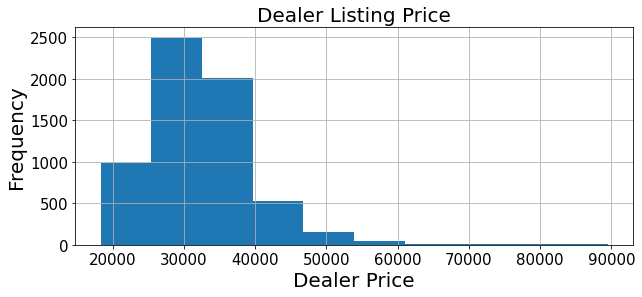

In [8]:
Training_df['Dealer_Listing_Price'].hist(figsize = (10,4))
plt.xlabel('Dealer Price', fontsize = 20)
plt.ylabel('Frequency',fontsize = 20)
plt.title('Dealer Listing Price', fontsize = 20)
plt.tick_params(axis="x", labelsize=15)
plt.tick_params(axis="y", labelsize=15)
plt.grid(True)
plt.show()

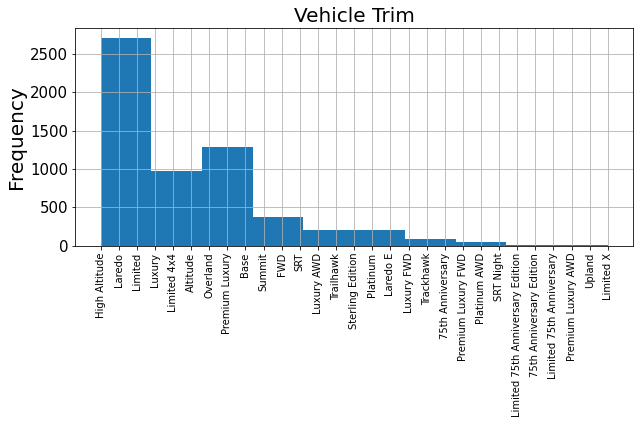

In [9]:
Training_df['Vehicle_Trim'].hist(figsize = (10,4))
plt.ylabel('Frequency',fontsize = 20)
plt.title('Vehicle Trim', fontsize = 20)
plt.tick_params(axis="x", labelsize=10, rotation=90)
plt.tick_params(axis="y", labelsize=15)
plt.grid(True)
plt.show()

###  Distribution of Numerical Variables

In [10]:
numeric_columns = ['SellerRating', 'SellerRevCnt', 'VehListdays', 'VehMileage', 'VehYear']

In [11]:
def hist_plot(df,a):
    df[a].hist(figsize = (8,3))
    plt.xlabel(a, fontsize = 15)
    plt.ylabel('Frequency',fontsize = 15)
    plt.tick_params(axis="x", labelsize=10)
    plt.tick_params(axis="y", labelsize=10)
    plt.grid(True)
    plt.show()

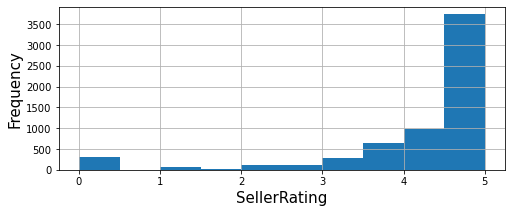

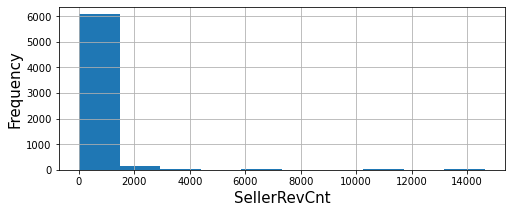

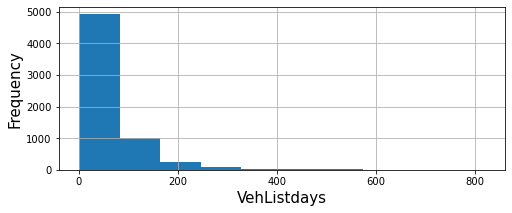

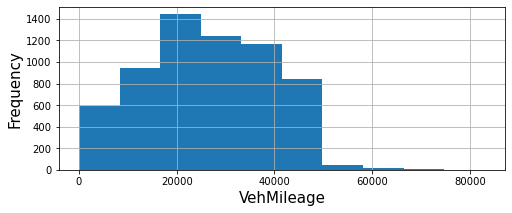

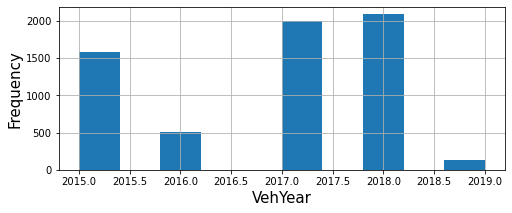

In [12]:
for i in numeric_columns:
    hist_plot(Training_df, i)

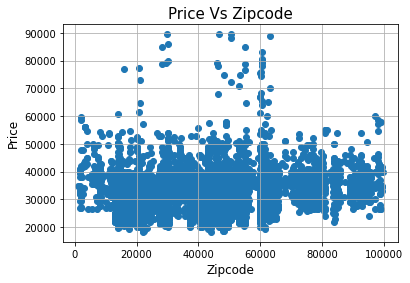

In [13]:
plt.scatter(Training_df['SellerZip'], Training_df['Dealer_Listing_Price'])
plt.title('Price Vs Zipcode', fontsize = 15)
plt.xlabel('Zipcode', fontsize = 12)
plt.ylabel('Price', fontsize = 12)
plt.grid()
plt.show()

It seems zipcode does not provide a clear difference in reference to the `Price` target variable.

In [14]:
list_of_types = Training_df.dtypes.tolist()
variables = Training_df.columns.tolist()

categorical = []
others = []

for i in range(len(variables)):
    if list_of_types[i] == 'O':
        categorical.append(variables[i])
    else:
        others.append(variables[i])

In [15]:
unique_categorical = []
for i in categorical:
    number_of_categories = len(pd.unique(Training_df[i]))
    unique_categorical.append(number_of_categories)

In [16]:
unique_categorical_df = pd.DataFrame()
unique_categorical_df['Categorical Variable'] = categorical
unique_categorical_df['Number Of Unique Values'] = unique_categorical
unique_categorical_df

,Categorical Variable,Number Of Unique Values
0,SellerCity,1318
1,SellerListSrc,9
2,SellerName,2452
3,SellerState,50
4,VehBodystyle,1
5,VehColorExt,170
6,VehColorInt,107
7,VehDriveTrain,21
8,VehEngine,97
9,VehFeats,844


Here we an see that some categories/columns have values that are very unique as `VehSellerNotes` (which makes sense as these are notes from the seller) and other categories have very unique as `VehType` & `VehBodyStyle` with just one value.

## Data Formatting (Training Dataset & Testing Dataset)

### Missing Values

In [17]:
def missing_values(data):
    #columns = data.columns.to_list()
    missing_values = []
    my_list = data.columns.values.tolist()
    y = data.shape
    for i in my_list:
        x = data[i].isnull().sum()
        missing_values.append(x)

    columns_missing = dict(zip(my_list, missing_values))
    a = sorted(columns_missing.items(), key=lambda x: x[1], reverse = True)  

    missing_columns_names = []
    for key, value in columns_missing.items():
        if value > 0: 
            x = key
            missing_columns_names.append(x)
    return columns_missing, missing_columns_names

In [18]:
#Training Data
dic_missing, missing_columns_names = missing_values(Training_df)

#Testing Data
dic_missing_test, missing_columns_names_test = missing_values(Test_df)

In [19]:
missing_training_df = pd.DataFrame()
missing_training_df['Variable'] = Training_df.columns.values.tolist()
missing_training_df['Number Of Missing Variables'] = dic_missing.values()
missing_training_df

,Variable,Number Of Missing Variables
0,ListingID,0
1,SellerCity,0
2,SellerIsPriv,0
3,SellerListSrc,2
4,SellerName,0
5,SellerRating,0
6,SellerRevCnt,0
7,SellerState,0
8,SellerZip,2
9,VehBodystyle,0


Looking at the Train Dataset we can see that there are some columns with more than 10% (`VehColorInt`) of missing data points.

In [20]:
missing_test_df = pd.DataFrame()
missing_test_df['Variable'] = Test_df.columns.values.tolist()
missing_test_df['Number Of Missing Variables'] = dic_missing_test.values()
missing_test_df

,Variable,Number Of Missing Variables
0,ListingID,0
1,SellerCity,0
2,SellerIsPriv,0
3,SellerListSrc,0
4,SellerName,0
5,SellerRating,0
6,SellerRevCnt,0
7,SellerState,0
8,SellerZip,0
9,VehBodystyle,0


In [21]:
# For the training data the missing values will be removed
data = Training_df.copy()
data.dropna(inplace = True)
data.shape
data = data.reset_index()

If the missing data is dropped we will reduce the dataset by around 20%. Depending on the example and the size of the dataset other options might be replacing the values with the mean/median (if numerical) or mode (if categorica).

In [25]:
# For the testing data the missing values will be filled with the mode and median
test_data = Test_df.copy()
categorical_test_missing = ['VehColorExt', 'VehColorInt', 'VehDriveTrain', 'VehEngine', 'VehFeats', 'VehHistory', 'VehPriceLabel', 'VehSellerNotes', 'VehTransmission']
numerical_test_missing = ['VehMileage']

# Replace missing values by median and mode
import statistics as st

for i in numerical_test_missing:
    test_data[i].fillna(test_data[i].median(), inplace=True)
    
for i in categorical_test_missing:
    test_data[i].fillna(st.mode(test_data[i]), inplace=True)

### Removing Columns from dataset

Based on the nature of the data some columns will be removed as they do not add to the prediction:
- `ListingID` (as is a unique value per entry)
- `VehSellerNotes` (need more procesing to be used)
- `SellerZip`
- `VehType` (as it has just one value)
- `VehBodystyle` (as it has just one value)

In [29]:
# For Training Dataset
data.drop(columns=['ListingID', 'VehSellerNotes', 'SellerZip', 'VehType', 'VehBodystyle', 'index'], inplace = True)
columns_updated = data.columns.to_list()

In [30]:
# For Testing Dataset
test_data.drop(columns=['VehSellerNotes', 'SellerZip','VehType', 'VehBodystyle'], inplace = True)
test_columns_updated = test_data.columns.to_list()